# Introduction to Statistics in Python


## Summary statistics

There are two types of data - Numeric and Categorical

Numeric data can by either continouos (measured) or discrete (counted)

Catgorical can be either nominal(unordered) or ordinal(ordered)

In [10]:
import pandas as pd 
import numpy as np

food = pd.read_csv("databases/food.csv", index_col=0)

np.mean(food['consumption'])

28.1104055944056

In [2]:
np.median(food['consumption'])

8.89

In [3]:
#mode - the most frequent value

food["country"].value_counts()

#OR

import statistics
statistics.mode(food["country"])

'Argentina'

Mean is much more senstitive to the extreme values

Variance

In [4]:
np.var(food["consumption"], ddof=1)

2481.837553789192

Standard deviation

In [5]:
np.sqrt(np.var(food["consumption"], ddof=1))

#OR

np.std(food["consumption"], ddof=1)

49.81804445970548

Quantiles

In [6]:
np.quantile(food["consumption"], 0.5)
np.quantile(food["consumption"], [0, 0.25, 0.5, 0.75, 1])

#We will get the same result if we use:
np.quantile(food["consumption"], np.linspace(0, 1, 4))

array([  0.        ,   4.16333333,  18.79333333, 430.76      ])

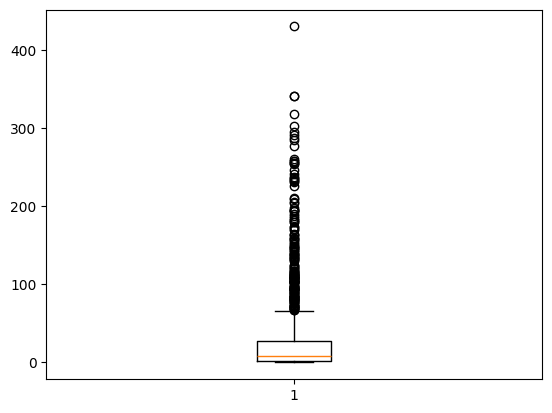

In [7]:
import matplotlib.pyplot as plt 

plt.boxplot(food["consumption"])
plt.show()

IQR

The distance between 25th and 75th percentile

In [8]:
print(np.quantile(food["consumption"], 0.75) - np.quantile(food["consumption"], 0.25))

# OR 
from scipy.stats import iqr
iqr(food["consumption"])

25.767500000000002


25.767500000000002

In [ ]:
# Calculate the lower and upper cutoffs for outliers

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

In [13]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


## Random Numbers and Probability

In [15]:
import pandas as pd 

brics = pd.read_csv("databases/brics.csv")

brics[["country"]].sample() #choses a random element

,country
0,Brazil


In [16]:
np.random.seed(20) #by setting the seed we gurantee that we will always get the same result
brics[["country"]].sample()

,country
1,Russia


In [17]:
brics[["country"]].sample(2) #this give us two random elements

,country
3,China
4,South Africa


Samplings can be either with replacement (if we replace, then we always have the same chances like that the person will be picked for the job) or without replacement

In [18]:
#to allow samplings with replacement we should set replace to True
brics[["country"]].sample(3, replace = True)

,country
2,India
0,Brazil
0,Brazil


Events can be either dependant (when the outcome of the first one influences the second one) or independant (when there is no influene between events)

In [19]:
np.linspace(1, 7, 7) #return a list of 7 numbers between 1 and 7

array([1., 2., 3., 4., 5., 6., 7.])

***Law of large numbers*** - as the size of your sample increases, the sample mean will approach the expected value

Expected value of the distribution is the mean that is the sample is expected to have at large sample size

### Continuous distributions

Uniform distribution

In [20]:
# To find out the probability that we will have to wait for the bus 7 minutes
#Given that it arrives every 12 minutes and that we have a uniform distribution
from scipy.stats import uniform
less_than_seven = uniform.cdf(7, 0, 12)
print(round(less_than_seven, 2))

#Waiting more that 7 minutes
more_than_seven = 1 - uniform.cdf(7, 0, 12)
print(round(more_than_seven, 2))

#Waiting from 4 to 7 minutes
greater4_less7 = uniform.cdf(7, 0, 12) - uniform.cdf(4, 0, 12) 
round(greater4_less7, 2)

0.58
0.42


0.25

In [21]:
from scipy.stats import uniform
uniform.rvs(0, 5, size=10) 
#generating 10 random values between 0 and 5 according to the uniform distribution

array([0.20586664, 4.20787067, 4.08277148, 3.91255706, 3.6763367 ,
       2.38693851, 4.33101161, 1.57762107, 4.53266975, 0.00685486])

### Discrete distribution

binomial distribution

In [22]:
from scipy.stats import binom
#we throw a coin - 1 is head 0 is tails

#Fliping 1 coin with a 50% probability of getting heads and we flip it 1 time only
print(binom.rvs(1, 0.5, size=1))

#Flipiing 1 coin 8 times - we get an array of values
print(binom.rvs(1, 0.5, size=8))

#we flip 8 coins one time and as a reult we get a single number, which represents the number of heads we got
print(binom.rvs(8, 0.5, size=1))


[1]
[0 0 0 1 1 0 0 0]
[3]


In [23]:
#Calculates the prob that we will get EXACTLY 7 heads out of 10 flips with a 0.5 chance of getting a head
binom.pmf(7, 10, 0.5)

0.11718749999999996

In [24]:
# The prob of getting LESS THAN OR EQUAL TO 7 heads out of ten
binom.cdf(7, 10, 0.5)

0.9453125

Expected value is equal to n * p.

Remember that in binomial distribution all trials must be independent

## More Distributions and the Central Limit Theorem

### The normal distribution

When the normal distribution has a mean = 0 and std = 1 it is a special distribution called standard normal distribution

In [25]:
#What percent of women are shorter than 154 cm?

from scipy.stats import norm
norm.cdf(154, 161, 7) #we specify the needed value, mean and std

0.15865525393145707

In [26]:
#What percent of women are taller than 154 cm?

from scipy.stats import norm
1 - norm.cdf(154, 161, 7)

0.8413447460685429

In [27]:
#To calculate percentiles
## What height are 90% of women shorter than?

norm.ppf(0.9, 161, 7) #we specify the percentile, mean and std

169.9708609588122

In [28]:
#Generating random numbers

norm.rvs(161, 7, size=10) #mean, std, size

array([158.3210443 , 165.74786657, 166.25483646, 148.50684267,
       156.79976555, 166.00483276, 164.55977287, 165.82418208,
       155.02204549, 160.14625069])

### The central Limit Theorem

The sampling distribution of a statistic becomes closer to the normal distribution as the number of trials increases

In [ ]:
#If we work with a DataFrame we should use:
df["column"].hist()

#if we work with a list or a numpy array:
plt.hist(list)

#This is because pandas is built on top of matplotlib and has inherited some of its features

### The poisson distribution (discrete)

In [30]:
#If the average number of adoptions per week is 8, what is the probability it is going to equal 5
#equal 5
from scipy.stats import poisson

poisson.pmf(5, 8)

#Less than 5
poisson.cdf(5, 8)

0.19123606207962535

In [31]:
#Sampling with lambda=8

poisson.rvs(8, size=10)

array([ 6,  7,  6, 13, 11, 13,  8,  4,  9,  7], dtype=int64)

### Exponential distribution (continuous)

Probability of time between Poisson events

lambda (expected value) in the case of Poisson signifies number of events per minute - if ticket is bought every two minutes, the lambda will be equal to 0.5

As for the expected value of Exponential distribution it can be calculated by dividing 1 by lambda so in our example it wiil be 1/0.5 = 2

In [32]:
from scipy.stats import expon

expon.cdf(1, scale=2)

0.3934693402873666

### t-distribution (continuous)

It is similar to a normal distribution. however the tails are thicker (there are more observations there)

### Log-normal distribution

## Correlation and Experimental Design

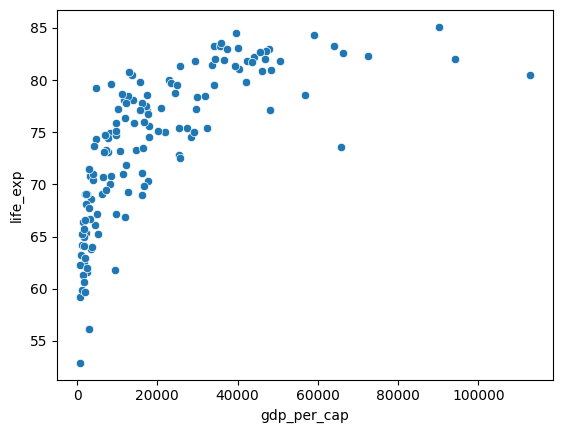

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

freedom = pd.read_csv("databases/freedom.csv")
sns.scatterplot(x="gdp_per_cap", y="life_exp", data = freedom)
plt.show()

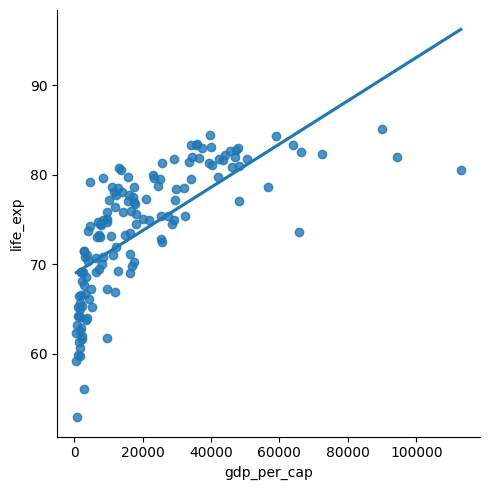

In [34]:
sns.lmplot(x="gdp_per_cap", y="life_exp", data = freedom, ci=None)
plt.show()

In [53]:
#Calculating correlation1
freedom["gdp_per_cap"].corr(freedom["life_exp"])

0.7019547642148015

It is important not to forget to visualize your data as sometimes correlation can't be trusted

### Log transformation

In [51]:
# The idea is to make relatioship between variables more linear
freedom["log_life_exp"] = np.log(freedom["life_exp"])

In [54]:
freedom["gdp_per_cap"].corr(freedom["log_life_exp"])

0.6841582633142026

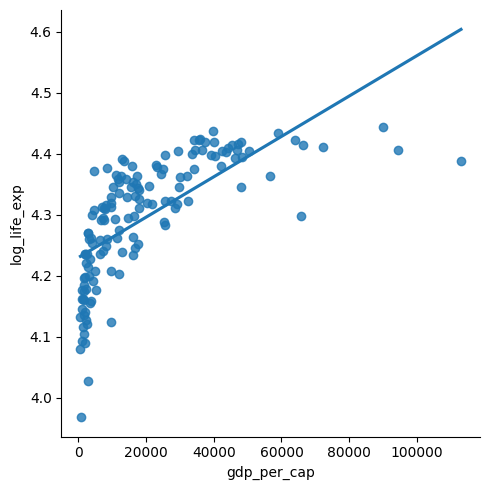

In [55]:
sns.lmplot(x="gdp_per_cap", y="log_life_exp", data = freedom, ci=None)
plt.show()